**Steps of implementation**

Step 1: Load data

Step 2: Create Bigrams

Step 3: Perform One-hot encoding

Step 4: Create a model and train

Step 5: Visualize results

#LOAD DATA

In [1]:
file = open('/content/word_embedding.txt' ,'r')
data = file.readlines()
file.close()
print(data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


convert into lowercase and tokenise

In [2]:
for i in range(len(data)):
    data[i] = data[i].lower().replace('\n' , '')
print(data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


#REMOVE STOP WORDS AND TOKENISE

In [3]:
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filter_data = []
for sent in data:
    temp = []
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filter_data.append(temp)
print(filter_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


#CREATING BIGRAMS

we'll take all the combination possible from each sentence to maximise bigrams

In [4]:
bigrams = []

for word_list in filter_data:
    for i in range(len(word_list)-1):
        for j in range(i+1 , len(word_list)): #code to get permutation
            bigrams.append([word_list[i] , word_list[j]])
            bigrams.append([word_list[j] , word_list[i]])
print(bigrams)


[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


#CREATE VOCABULARY

In [5]:
all_words = []
for sent in filter_data:
    all_words.extend(sent)
# to remove duplicate words use set()
all_words = list(set(all_words))
all_words.sort()
print(all_words)
print(len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
12


#ONE HOT ENCODING

In [6]:
# assign every word a token
word_dict = {}
counter = 0
for word in all_words:
    word_dict[word] = counter
    counter+=1
print(word_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [7]:
import numpy as np
one_hot_data = np.zeros((len(all_words) , len(all_words)))
for i in range(len(all_words)):
    one_hot_data[i][i] = 1
print(one_hot_data)
print('\n')
one_hot_dict = {}
for i in range(len(all_words)):
    one_hot_dict[all_words[i]] = one_hot_data[i]
for word in one_hot_dict:
    print(word , ':', one_hot_dict[word])



[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0.

In [8]:
X = []
Y = []
for bi in bigrams:
    X.append(one_hot_dict[bi[0]])
    Y.append(one_hot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)


#MODEL
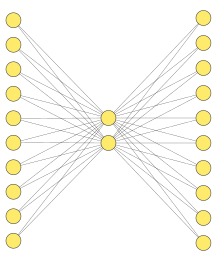

input layer == output layer

In [9]:
from keras.models import Sequential
from keras.layers import Dense

embed_size = 2 #coz we need weight of 2 words only

model = Sequential()
model.add(Dense(embed_size, activation='linear'))
model.add(Dense(Y.shape[1], activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [10]:
model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)


In [12]:
weights = model.get_weights()[0] #to get weight between output and hiddne layer

word_embedding = {}
for word in all_words:
    word_embedding[word] = weights[word_dict[word]]

print(word_embedding)

{'beautiful': array([-0.62000227, -0.6466193 ], dtype=float32), 'boy': array([1.0338781, 1.0365535], dtype=float32), 'daughter': array([ 0.8978836, -1.5325079], dtype=float32), 'future': array([ 1.3797158 , -0.01881299], dtype=float32), 'king': array([0.939301 , 1.5685927], dtype=float32), 'man': array([0.3253093 , 0.30307505], dtype=float32), 'prince': array([-0.47857454,  0.8839597 ], dtype=float32), 'princess': array([-1.5996612 , -0.75348705], dtype=float32), 'queen': array([-0.7426366, -1.5798181], dtype=float32), 'son': array([1.135034 , 0.7710205], dtype=float32), 'strong': array([1.1496443, 1.1141628], dtype=float32), 'woman': array([-0.24347688, -1.5052496 ], dtype=float32)}


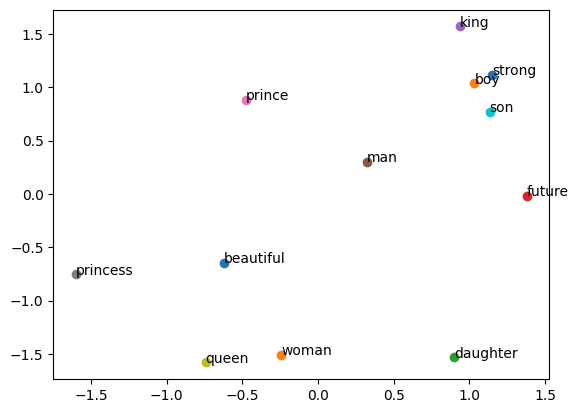

In [21]:
import matplotlib.pyplot as plt

for word in list(word_dict.keys()):
    coord = word_embedding.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

